# Homework 2: Experiments with kNN and Decision Tree Classifiers

Here we explore a little bit more the performance of the two classifiers of the week. We will do this in the context of a dataset that comes with sklearn, namely https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

1. Load this dataset using sklearn's load_breast_cancer() utility


2. Split the dataset into train and test set, let's set test_size=0.33, random_state=41

3. Apply the kNN Classifier. Make a plot of the accuracy score as a function of the parameter k ranging from 1 to the maximal number of available features, as in lab 3. Which value is best?

4. Apply the StandardScaler to the training data and repeat 3. Any changes? Please comment.

5. Now apply the Decision Tree classifier, random_state=3. There are several (hyper)parameters that control the behavior of the classifier and hence the output. Two important ones are max_depth and max_features. They are set to "None" by default. Compute the accuracy score for all possible combinations of these two parameters ranging from 1 to the maximally meaningful values, and find the combination that gives the highest accuracy score. Visualize the data in a surface or heat map plot, for instance using matplotlib's pcolor function.

6. A nice feature of decision trees is that they are "interpretable", i.e. one can get an understanding of which features are the most important ones in the decision process. For this purpose, you can output the property feature_importances_, which lists the mean impurity decrease due to each feature.

   (a) Make a bar chart of these "feature importances" for the optimized tree classifier from 5., and find the three most important features. What should the physician who needs to diagnose whether the sample is malignant or not primarily look for?

   (b) Use plot_tree as in lab 4 to visualize the decision tree. Can you explain the relationship between the feature importances you plotted in (a) and the tree structure?



In [1]:
# 1

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as pch
import pandas as pd
from sklearn import neighbors, metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn

data = datasets.load_breast_cancer()

In [2]:
# 2
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)

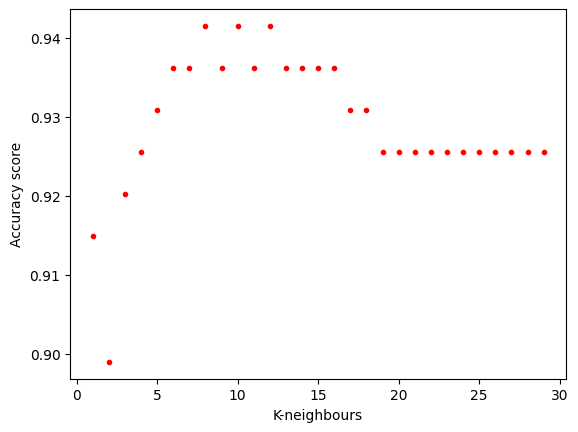

accuracy maximized at following k values (any value here is best):
[ 8 10 12]


In [4]:
# 3
def apply_kNN():
    ks = np.arange(1, len(data['feature_names']), 1)
    accuracies = []
    for k in ks:
        neigh  = neighbors.KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        ypredict_test  = neigh.predict(X_test)
        accuracy  = sklearn.metrics.accuracy_score(y_test , ypredict_test)
        accuracies.append(accuracy)

    #print('accuracies: ', accuracies)

    plt.plot(ks, accuracies, 'r.')
    plt.xlabel("K-neighbours")
    plt.ylabel("Accuracy score")
    plt.show()

    print('accuracy maximized at following k values (any value here is best):')
    ks_max = ks[np.where(accuracies == max(accuracies))]
    print(ks_max)
    
apply_kNN()

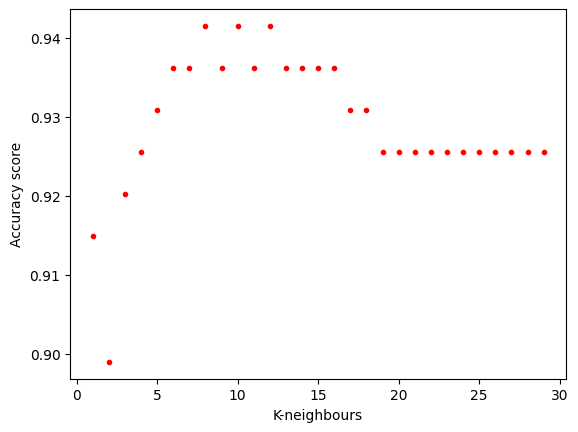

accuracy maximized at following k values (any value here is best):
[ 8 10 12]


In [5]:
# 4

from sklearn.preprocessing import StandardScaler
own_model = StandardScaler().fit(X_train)
Xtrain = own_model.fit_transform(X_train)
Xtest = own_model.fit_transform(X_test)

apply_kNN()

StandardScalar is used to standardize features by removing the mean and scaling to unit variance. Since every feature is translated equally (mean removal) -> the neighbours remain the same. Scaling impacts the distance of the neighbours but the closest k neighbours still remain the closest. 

In [6]:
# 5

features = np.arange(1, len(data['feature_names']), 1)
depth = np.arange(1, 10, 1)

accuracies = np.zeros((len(features), len(depth)))
acctrain   = np.zeros((len(features), len(depth)))

for i in features:
    for j in depth:
        method = DecisionTreeClassifier(random_state = 3, max_depth = i, max_features = j)
        model = method.fit(X_train, y_train)
        ypredict_test = model.predict(X_test)
        ypredict_train = model.predict(X_train)
        acctrain[i-1,j-1]  = metrics.accuracy_score(y_train, ypredict_train)
        accuracies[i-1,j-1] = metrics.accuracy_score(y_test , ypredict_test)


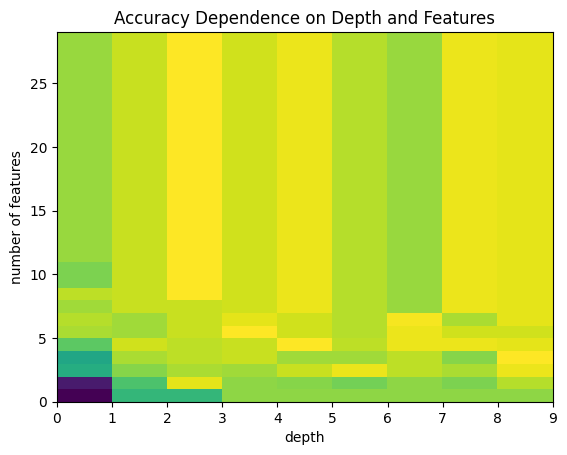

In [7]:
plt.pcolor(accuracies)
plt.xlabel("depth")
plt.ylabel("number of features")
plt.title("Accuracy Dependence on Depth and Features")
plt.show()

In [8]:
indices = np.where(accuracies == np.max(accuracies))
feature_index = indices[0]
depth_index = indices[1]

print('# of features     ', "depth")
for i,j in zip(feature_index,depth_index):
    print(i+1,"                 ",j+1) # now actual values


# of features      depth
4                   9
5                   5
6                   4
9                   3
10                   3
11                   3
12                   3
13                   3
14                   3
15                   3
16                   3
17                   3
18                   3
19                   3
20                   3
21                   3
22                   3
23                   3
24                   3
25                   3
26                   3
27                   3
28                   3
29                   3


Any of the values printed above maximize the accuracy on the test data. I believe the best values would be first minimizing depth, then minimizing the number of features to reduce the complexity of our tree.

The would mean max_depth = 3 and max_features = 9 would be ideal

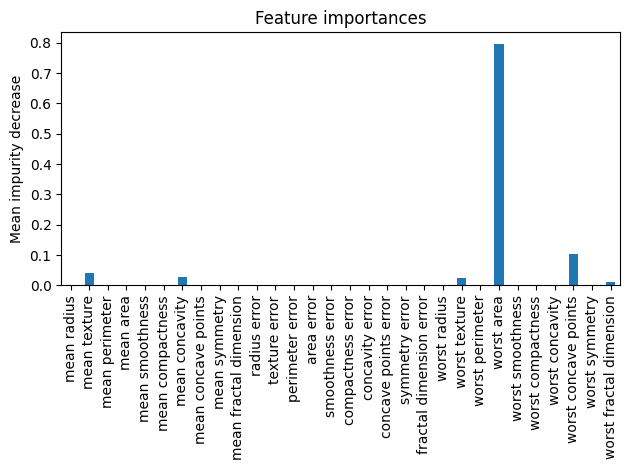

Top Three Features (What to look for): 
Worst Area: 0.79
Worst Concave Points: 0.10
Mean Texture: 0.04


In [11]:
## 6a ##

method = DecisionTreeClassifier(random_state = 3, max_depth = 3, max_features = 9)
model = method.fit(X_train, y_train)
ypredict_test = model.predict(X_test)
ypredict_train = model.predict(X_train)

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=data['feature_names'])
fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean impurity decrease")
fig.tight_layout()
plt.show()


print("Top Three Features (What to look for): ")
print('Worst Area: {:.2f}'.format(feature_importances['worst area']))
print('Worst Concave Points: {:.2f}'.format(feature_importances['worst concave points']))
print('Mean Texture: {:.2f}'.format(feature_importances['mean texture']))

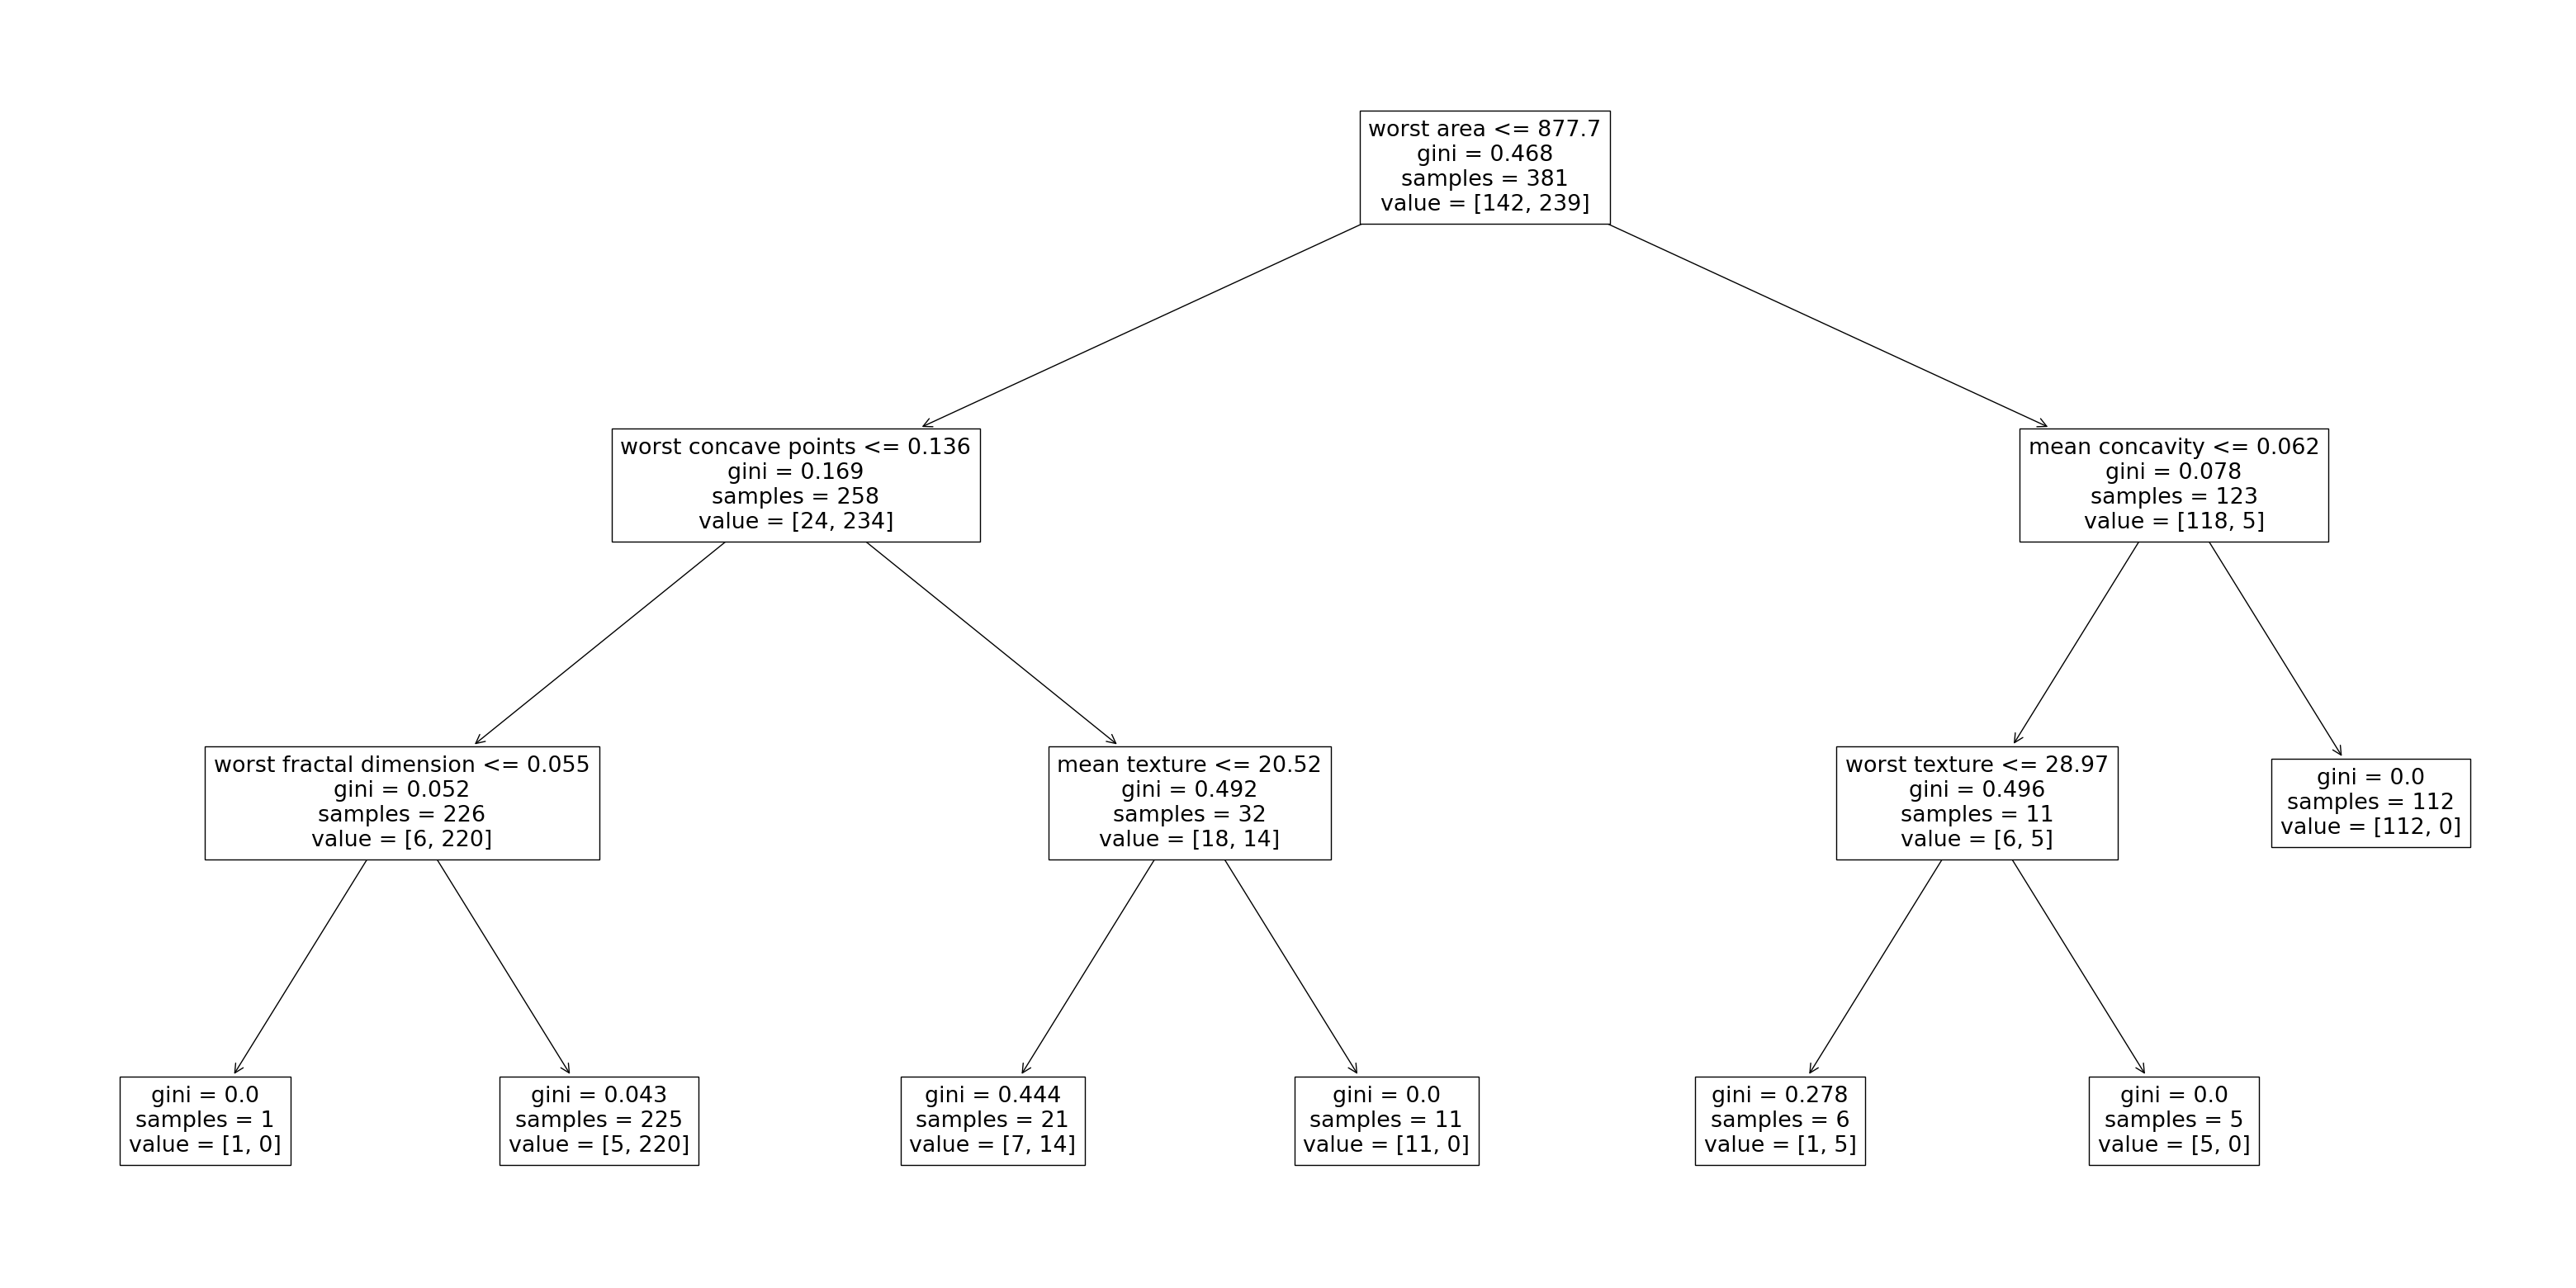

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(model, feature_names = data['feature_names'])
plt.show()

the ranking of the features defined the depth at which they are found 

 - The highest rank is the first binary split at the start of the tree
 - the second rank is on the second level
- and similiarly the third is on the third level.

the ranking of the features influence the hierarchy of the tree. With the highest rank given priority as first classification.